In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'axes.edgecolor':'0.1', 'grid.color':'0.9'})
import pandas as pd
import numpy as np

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "Times New Roman",
# })

In [273]:
data = {}

In [274]:
df1 = pd.read_csv('ModelSweep-21-06-2024-0103.csv')
data['DSPy (vanilla)'] = df1[df1['Program'].str.match(r'^DSPy$')]
data['MTLLM'] = df1[df1['Program'].str.match('Jac')]
df3 = pd.read_csv("ModelSweep-25-06-2024-2249.csv")
data['DSPy (compiled)'] = df3
fr_labels = ['DSPy (vanilla)','DSPy (compiled)','MTLLM']
df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]
models = ["gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"]

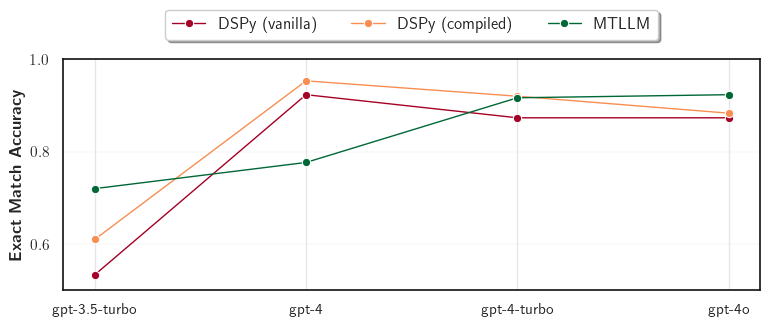

In [275]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.25),plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.ylim(0.5, 1)
plt.show
plt.savefig('ExactMatchAcccuracy.png', dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

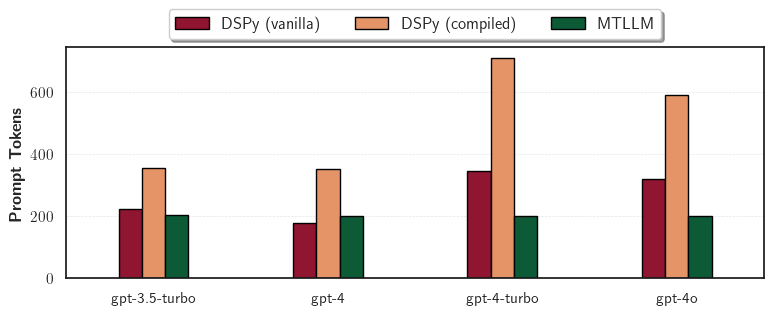

In [276]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="PromptTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Prompt Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('PromptTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

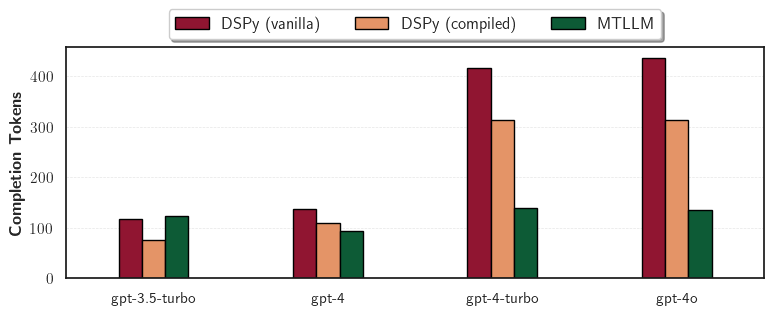

In [277]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="CompletionTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('CompletionTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

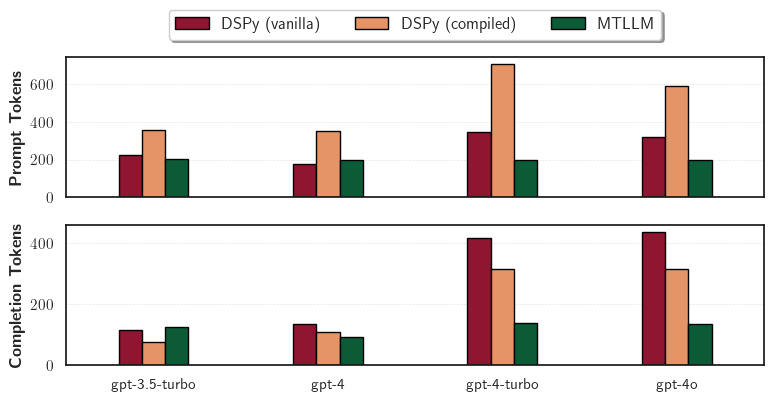

In [278]:
fig, axes = plt.subplots(2,1,figsize=(9, 4))

for i,plot in enumerate(["PromptTokens","CompletionTokens"]):
    # colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
    sns.barplot(x="Model", y=plot, hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=axes[i],edgecolor='black', linewidth=1)
    axes[i].set_xlabel("")
    # axes[i].set_ylabel("")
    if plot == "PromptTokens":
        axes[i].set_ylabel(r"\centering\textbf{Prompt Tokens}", fontsize=12)
        axes[i].legend().set_visible(False)
        axes[i].set_xticklabels([])
    else:
        axes[i].set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
        axes[i].legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 2.6), ncol=4)
    axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
    # ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    # plt.ylim(0, 400)
    plt.savefig('Token_usage.png', dpi=300, bbox_inches='tight')
plt.show

## New Data plots

In [279]:
data = {}

df_1 = pd.read_csv('ModelSweep-03-10-2024-1626-70B.csv')
# df_1 = pd.read_csv('ModelSweep-16-09-2024-1329.csv')
# df_1 = pd.read_csv('ModelSweep-01-10-2024-1303-70B.csv')
data['DSPy (vanilla)'] = df_1[df_1['Program'].str.match(r'^DSPy$')]
data['MTLLM'] = df_1[df_1['Program'].str.match('Jac')]
fr_labels = ['DSPy (vanilla)','MTLLM']
dff = pd.concat([data[framework] for framework in fr_labels])
dff = dff[dff["QuestionID"] <=2050]
models = ["gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"]

In [280]:
dff.head()

,Unnamed: 0,QuestionID,Question,GivenAnswer,Model,Program,Output,ExactMatch,Failed,Time(s),PromptTokens,CompletionTokens,RawPrompt,RawResponse
0,0,0,Natalia sold clips to 48 of her friends in Apr...,72,llama2:70b,DSPy,72,True,False,90.365486,152,153,"Given the fields `question`, produce the field...","[{""id"": ""chatcmpl-da39a3ee5e6b4b0d3255bfef9560..."
2,2,0,Natalia sold clips to 48 of her friends in Apr...,72,llama3:70b,DSPy,72,True,False,64.616623,117,90,"Given the fields `question`, produce the field...","[{""id"": ""chatcmpl-da39a3ee5e6b4b0d3255bfef9560..."
4,4,0,Natalia sold clips to 48 of her friends in Apr...,72,llama3.1:70b,DSPy,72,True,False,65.975015,117,83,"Given the fields `question`, produce the field...","[{""id"": ""chatcmpl-da39a3ee5e6b4b0d3255bfef9560..."
6,6,1,Weng earns $12 an hour for babysitting. Yester...,10,llama2:70b,DSPy,NaN,False,True,0.000000,149,178,"Given the fields `question`, produce the field...","[{""id"": ""chatcmpl-da39a3ee5e6b4b0d3255bfef9560..."
8,8,1,Weng earns $12 an hour for babysitting. Yester...,10,llama3:70b,DSPy,10,True,False,82.187248,109,123,"Given the fields `question`, produce the field...","[{""id"": ""chatcmpl-da39a3ee5e6b4b0d3255bfef9560..."


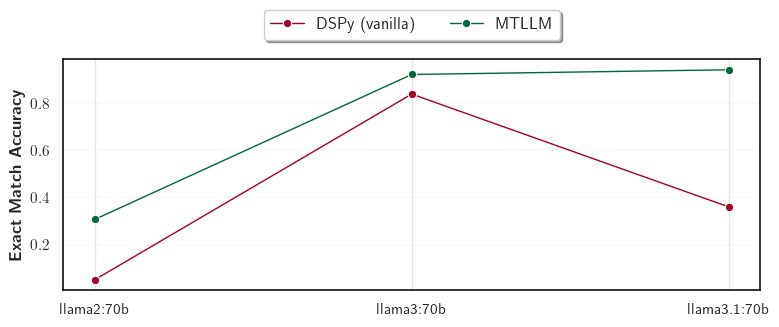

In [281]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=dff, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0.5, 1)
plt.show
plt.savefig('ExactMatchAcccuracy_llama.png', dpi=300, bbox_inches='tight')

In [282]:
# Assuming 'dff' is your DataFrame
# Filter relevant columns
dfff = dff[['Model', 'Program', 'ExactMatch', 'Failed', 'RawResponse']]

# Define response categories
conditions = [
    (dfff['ExactMatch'] == True) & (dfff['Failed'] == False),
    (dfff['ExactMatch'] == False) & (dfff['Failed'] == False),
    (dfff['Failed'] == True) & (dfff['RawResponse'] != '[]'),
    (dfff['RawResponse'] == '[]')
]
choices = ['Accurate', 'Not Accurate', 'Failed', 'Timeout']

# Create a new column for response category
dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')

# Aggregate counts
agg_df = dfff.groupby(['Model', 'Program', 'ResponseCategory']).size().reset_index(name='Count')


/tmp/ipykernel_2411176/837769474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')


In [283]:

desired_order = ['llama2:70b', 'llama3:70b', 'llama3.1:70b.DSPY']
# Pivot the dataframe to get a suitable format for stacked barplot
# agg_df  =pd.Categorical(df['Model'],categories=desired_order,ordered=True)
agg_df_1 = agg_df[agg_df['Model'] == 'llama3.1:70b']
agg_df_2 = agg_df[agg_df['Model'] != 'llama3.1:70b']
agg_df = pd.concat([agg_df_2, agg_df_1], ignore_index=True)


agg_df


,Model,Program,ResponseCategory,Count
0,llama2:70b,DSPy,Accurate,15
1,llama2:70b,DSPy,Failed,93
2,llama2:70b,DSPy,Not Accurate,8
3,llama2:70b,DSPy,Timeout,184
4,llama2:70b,Jac,Accurate,92
5,llama2:70b,Jac,Failed,40
6,llama2:70b,Jac,Not Accurate,168
7,llama3:70b,DSPy,Accurate,252
8,llama3:70b,DSPy,Not Accurate,15
9,llama3:70b,DSPy,Timeout,33


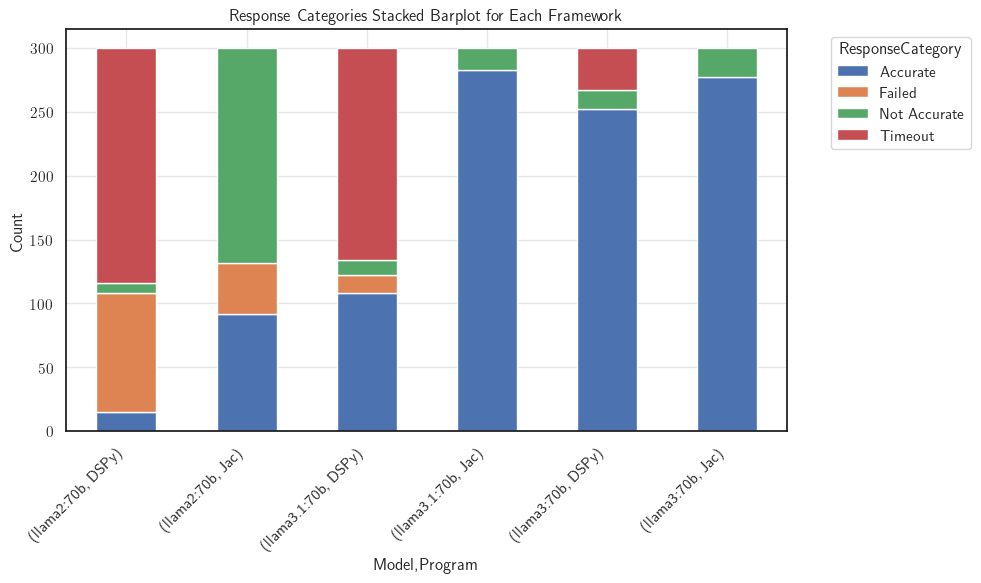

In [286]:


df_pivot = agg_df.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0)

# Plotting
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.ylabel('Count')
plt.title('Response Categories Stacked Barplot for Each Framework')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

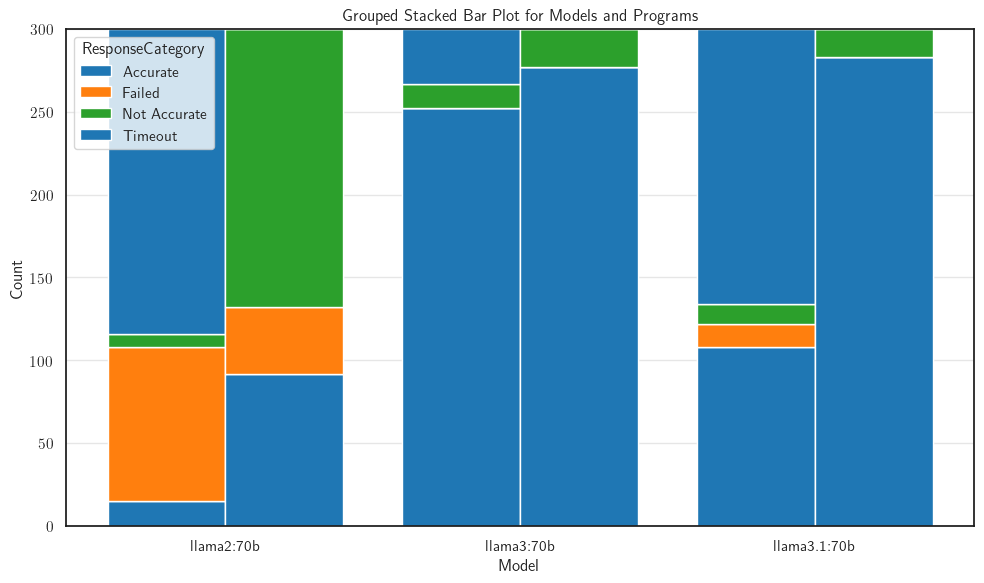

In [285]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Get the unique models and programs
models = agg_df['Model'].unique()
programs = agg_df['Program'].unique()

# Define color for each response category
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Add more colors if needed

# X-axis positions for the groups of bars
bar_width = 0.4  # Width of each bar
x = list(range(len(models)))  # Position of each model group

# Plot bars for each model
for i, model in enumerate(models):
    # Positions of the two bars (DSPy, Jac) for the current model
    bar_positions = [x[i] - bar_width / 2, x[i] + bar_width / 2]
    
    for j, program in enumerate(programs):
        if (model, program) in df_pivot.index:
            # Filter the data for the current model and program
            program_data = df_pivot.loc[(model, program)]
            bottom = None

            # Plot each response category as stacked bars
            for k, category in enumerate(program_data.index):
                if bottom is None:
                    bottom = [0] * len(bar_positions)
                ax.bar(
                    bar_positions[j],          # X position of the bar
                    program_data[category],    # Height of the bar
                    bar_width,                 # Bar width
                    label=category if i == 0 and j == 0 else "",  # Show the label only once in the legend
                    bottom=bottom,             # Stack on the previous category
                    color=colors[k % len(colors)]
                )
                bottom = [a + program_data[category] for a in bottom]  # Update bottom for stacking

# Customizing the plot
ax.set_xlabel('Model')
ax.set_ylabel('Count')
ax.set_title('Grouped Stacked Bar Plot for Models and Programs')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(title='ResponseCategory')

# Show plot
plt.tight_layout()
plt.show()